In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Housing.csv")
df = data

data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# New Section

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'], axis = 1)
y = data['price']

In [ ]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) #we are testing only 30% of the data

In [ ]:
train_data = x_train.join(y_train)

In [ ]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
266,4880,3,1,1,yes,no,no,no,no,2,yes,unfurnished,4403000
118,6420,3,1,1,yes,no,yes,no,yes,0,yes,furnished,5950000
156,6900,3,1,1,yes,yes,yes,no,no,0,yes,semi-furnished,5523000
432,6060,3,1,1,yes,yes,yes,no,no,0,no,furnished,3290000
42,6480,3,2,4,yes,no,no,no,yes,2,no,unfurnished,7700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,1750000
363,3584,2,1,1,yes,no,no,yes,no,0,no,semi-furnished,3710000
405,3060,3,1,1,yes,no,no,no,no,0,no,unfurnished,3465000
491,2640,2,1,1,no,no,no,no,no,1,no,furnished,2835000


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

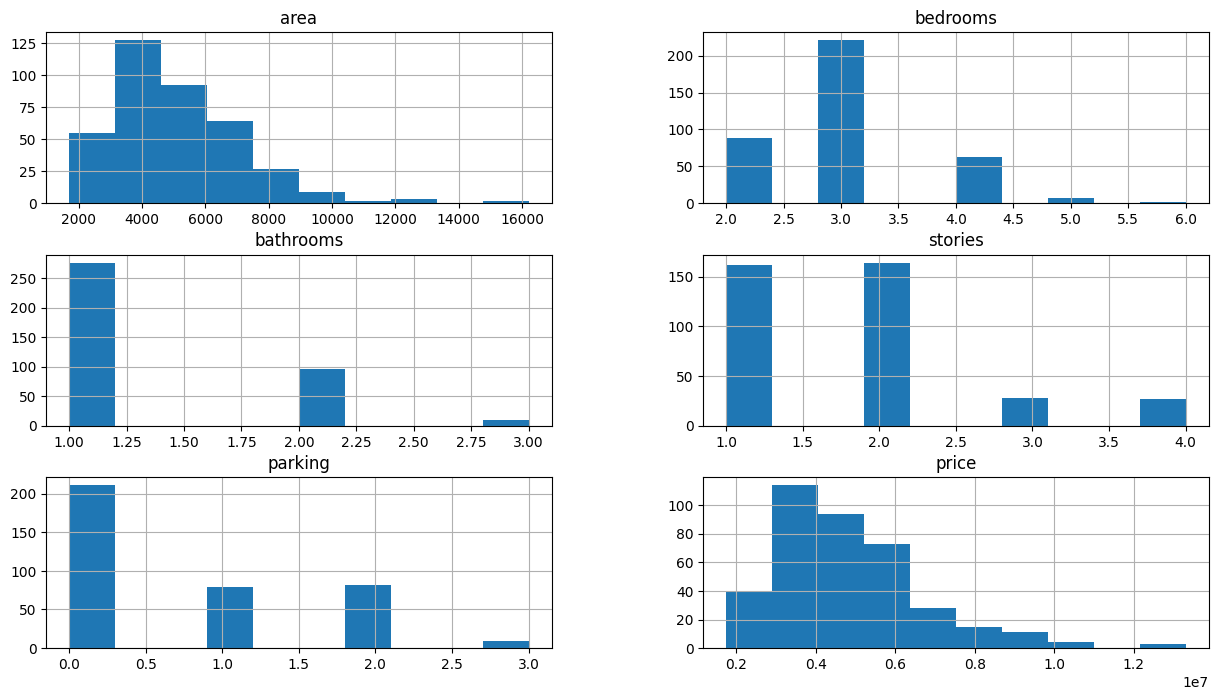

In [ ]:
train_data.hist(figsize=(15, 8))

<Axes: >

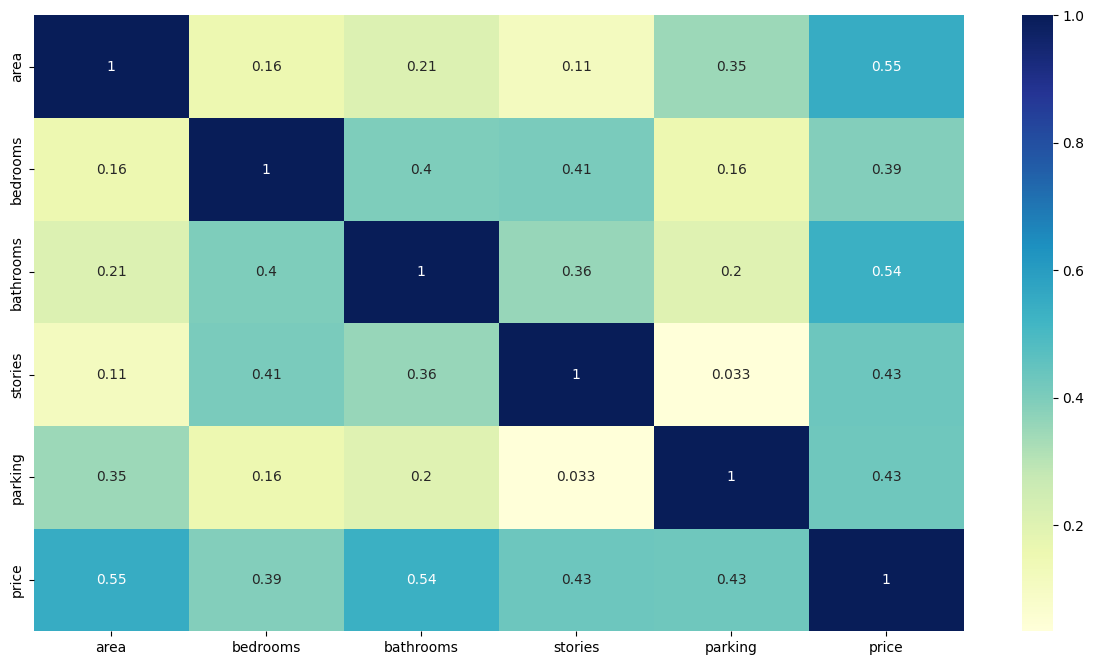

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['bedrooms'] = np.log(train_data['bedrooms'] + 1)
train_data['bathrooms'] = np.log(train_data['bathrooms'] + 1)
train_data['stories'] = np.log(train_data['stories'] + 1)
train_data['parking'] = np.log(train_data['parking'] + 1)

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

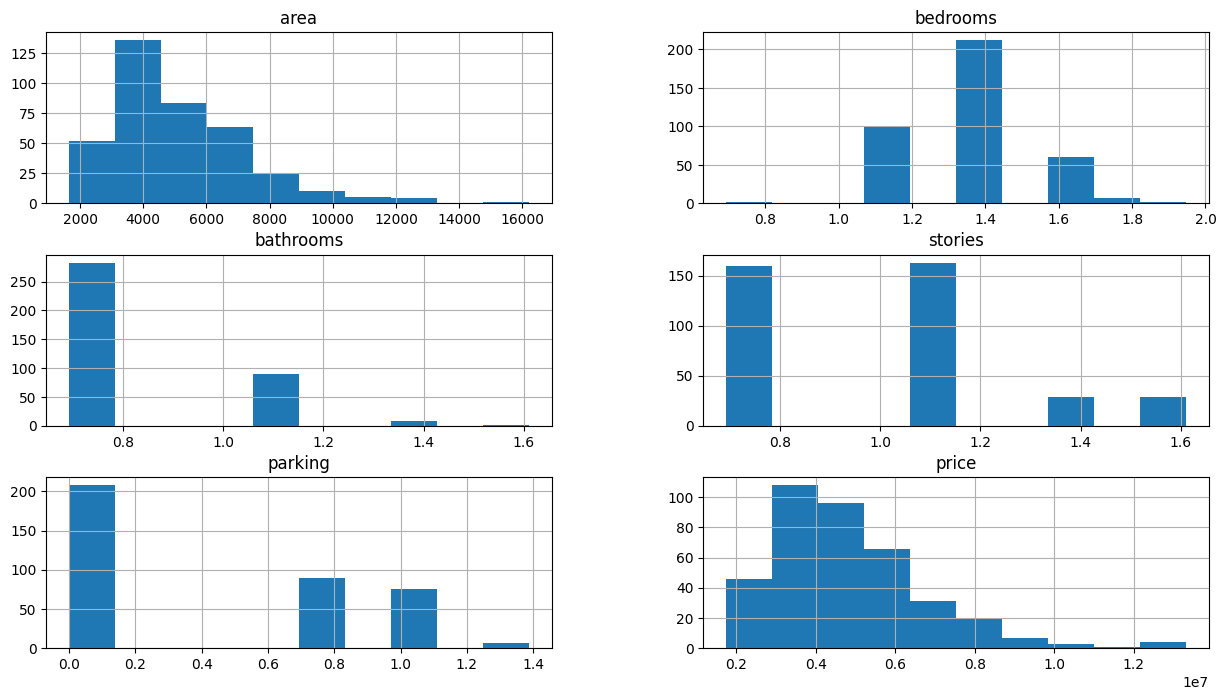

In [ ]:
train_data.hist(figsize=(15, 8))

In [ ]:
train_data.furnishingstatus.value_counts()

semi-furnished    154
unfurnished       127
furnished         100
Name: furnishingstatus, dtype: int64

In [ ]:
pd.get_dummies(train_data.furnishingstatus)

,furnished,semi-furnished,unfurnished
266,0,0,1
118,1,0,0
156,0,1,0
432,1,0,0
42,0,0,1
...,...,...,...
544,0,0,1
363,0,1,0
405,0,0,1
491,1,0,0


In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop(['furnishingstatus'], axis=1)

X_train_new

In [ ]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
362,4050,1.098612,0.693147,0.693147,yes,no,no,no,no,0.000000,no,3710000,1,0,0
407,2145,1.386294,0.693147,1.386294,yes,no,no,no,no,0.000000,yes,3465000,1,0,0
319,3000,1.609438,0.693147,1.386294,yes,no,yes,no,yes,1.098612,no,4060000,0,1,0
418,3500,1.609438,0.693147,1.098612,yes,no,no,no,yes,1.098612,no,3360000,0,0,1
103,6350,1.386294,1.098612,1.386294,yes,yes,no,no,yes,0.000000,no,6195000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2015,1.386294,0.693147,1.098612,yes,no,yes,no,no,0.000000,yes,3850000,0,1,0
475,3000,1.098612,0.693147,1.098612,yes,no,no,no,no,0.000000,no,2961000,0,1,0
313,3680,1.386294,1.098612,1.098612,yes,no,no,no,no,0.000000,no,4095000,0,1,0
138,5000,1.386294,0.693147,1.386294,yes,no,no,no,yes,0.000000,no,5740000,0,1,0


In [ ]:
columns_to_change = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_change:
    train_data[column] = train_data[column].replace({'yes': 1, 'no': 0})


In [ ]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
403,12944,1.386294,0.693147,0.693147,1,0,0,0,0,0.000000,0,3500000,0,0,1
192,6600,1.386294,0.693147,0.693147,1,1,1,0,0,0.000000,1,5040000,1,0,0
152,5400,1.791759,0.693147,1.098612,1,1,1,0,1,0.000000,1,5565000,1,0,0
198,5948,1.386294,0.693147,1.098612,1,0,0,0,1,0.000000,0,4935000,0,1,0
356,2520,1.791759,1.098612,0.693147,0,0,1,0,1,0.693147,0,3773000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,6840,1.791759,0.693147,1.098612,1,1,1,0,1,0.693147,0,8120000,1,0,0
386,3850,1.386294,0.693147,0.693147,1,0,0,0,0,1.098612,0,3535000,0,0,1
49,7440,1.386294,1.098612,0.693147,1,1,1,0,1,0.000000,1,7420000,0,1,0
196,7686,1.386294,0.693147,0.693147,1,1,1,1,0,0.000000,0,4970000,0,1,0


<Axes: >

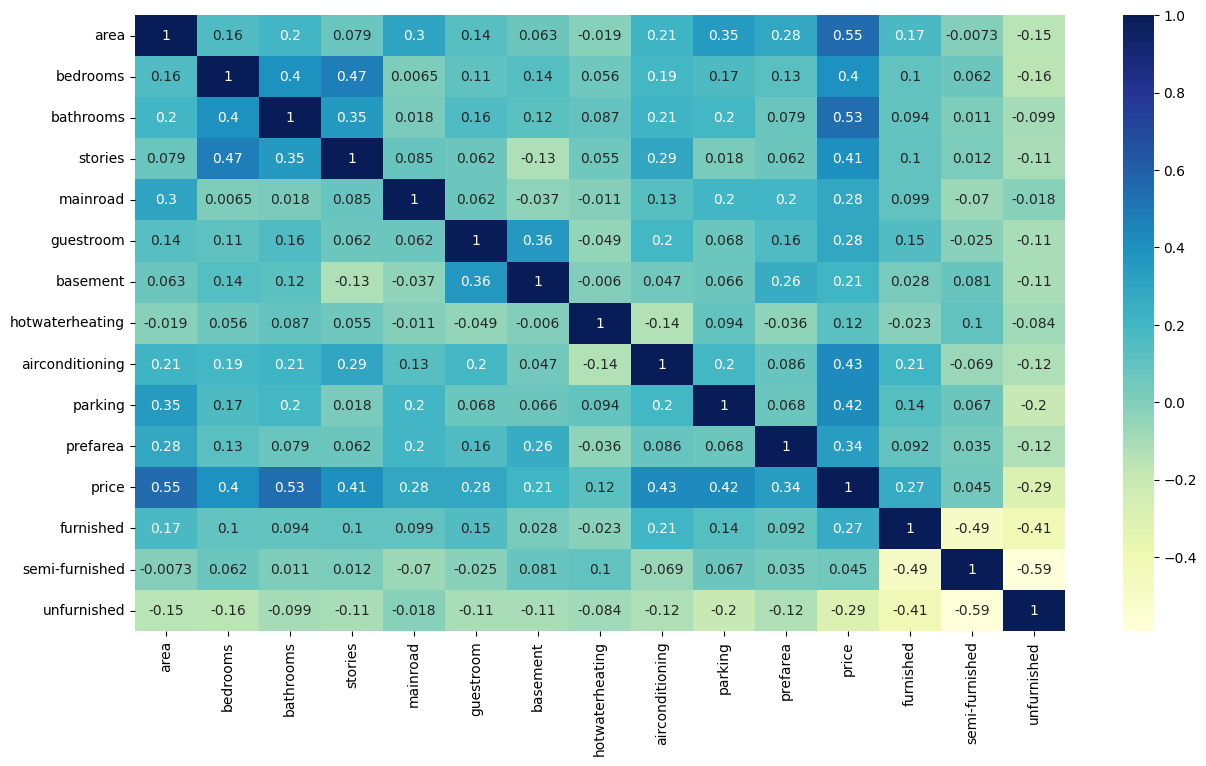

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
# combining area, bathrooms, and bedrooms
train_data['room_area_interaction'] = train_data['area'] * train_data['bathrooms'] * train_data['bedrooms']



<Axes: >

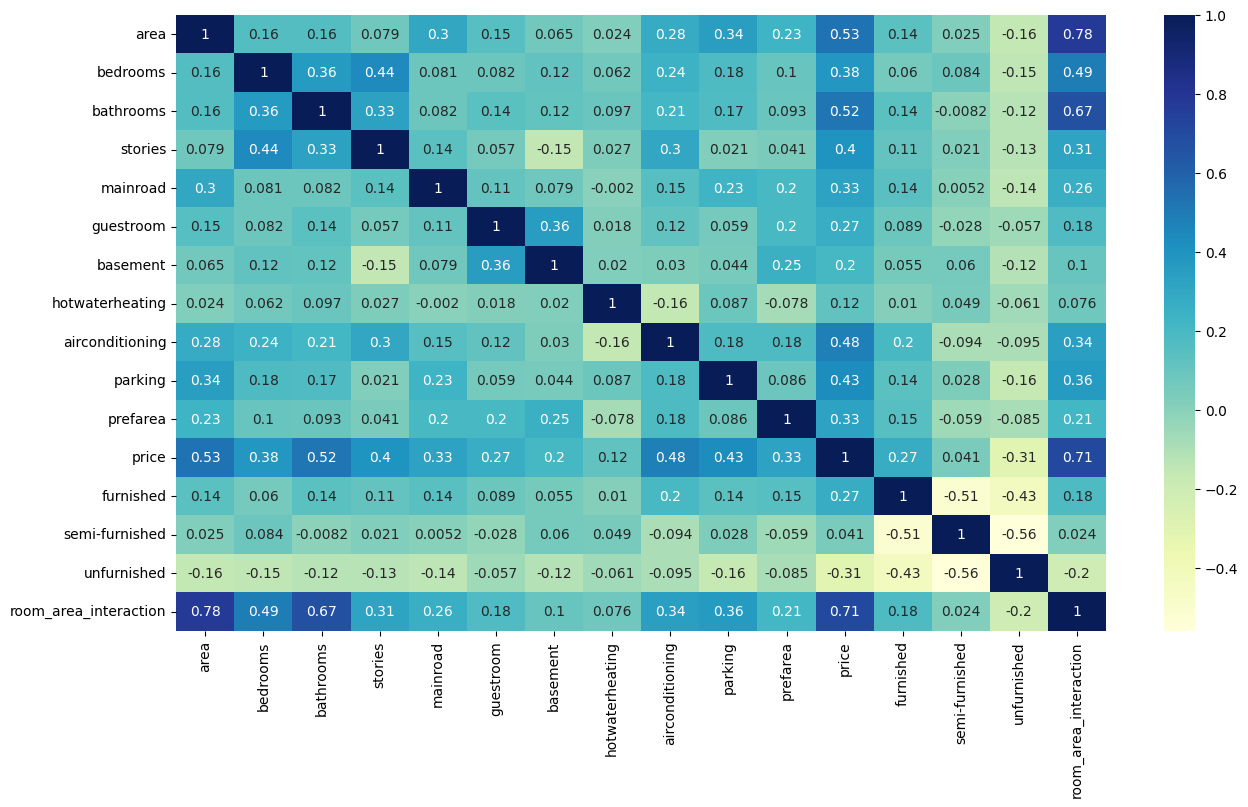

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
test_data = x_test.join(y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms'] + 1)
test_data['bathrooms'] = np.log(test_data['bathrooms'] + 1)
test_data['stories'] = np.log(test_data['stories'] + 1)
test_data['parking'] = np.log(test_data['parking'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus)).drop(['furnishingstatus'], axis=1)

columns_to_change = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_change:
    test_data[column] = test_data[column].replace({'yes': 1, 'no': 0})


test_data['room_area_interaction'] = test_data['area'] * test_data['bathrooms'] * test_data['bedrooms']


x_test, y_test = test_data.drop(['price'], axis=1), test_data['price']


In [ ]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
reg.score(x_test, y_test)

0.6626196475968147

In [ ]:
forest.score(x_test, y_test)

0.6755760611084796

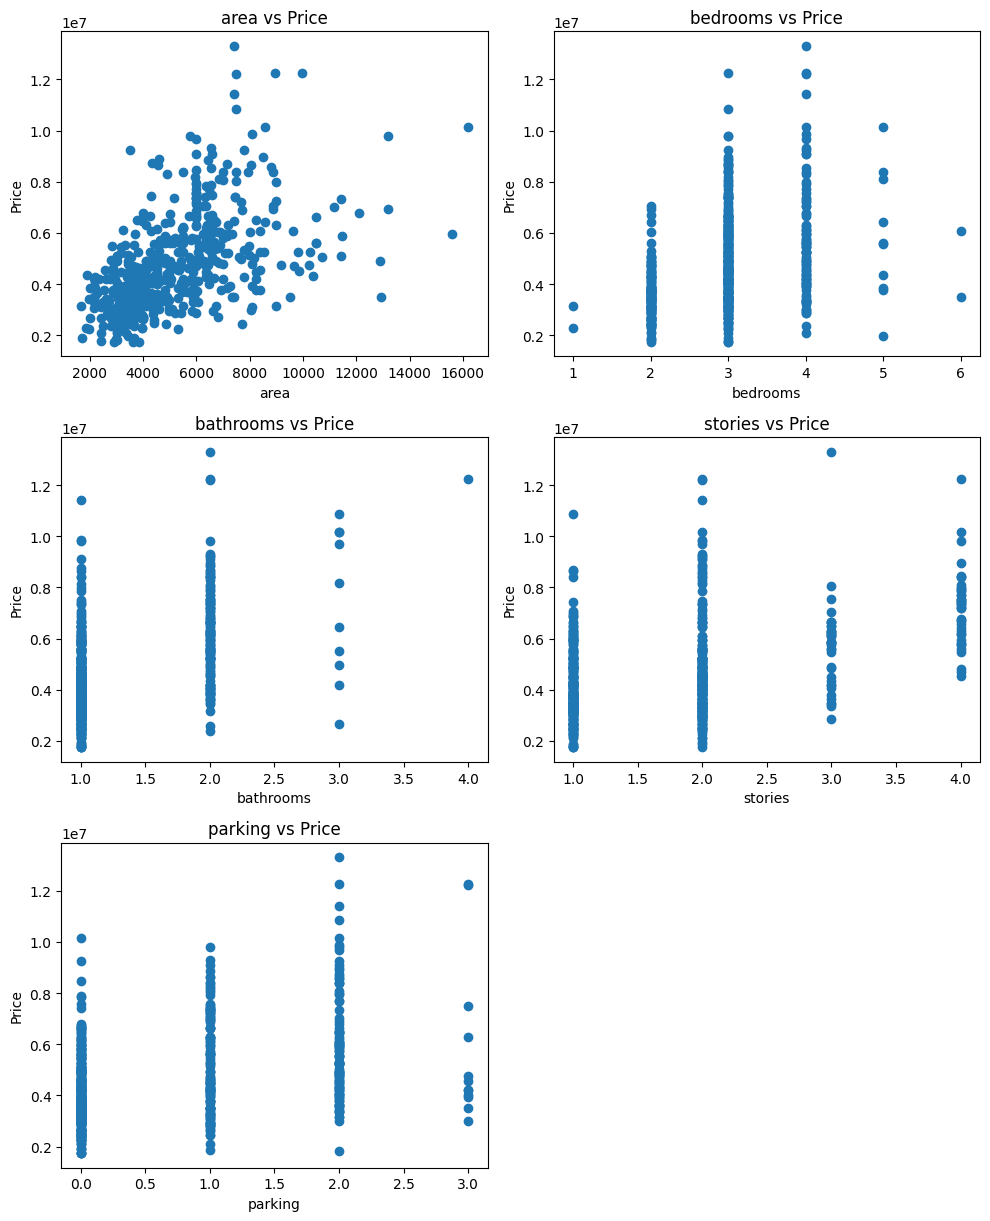

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


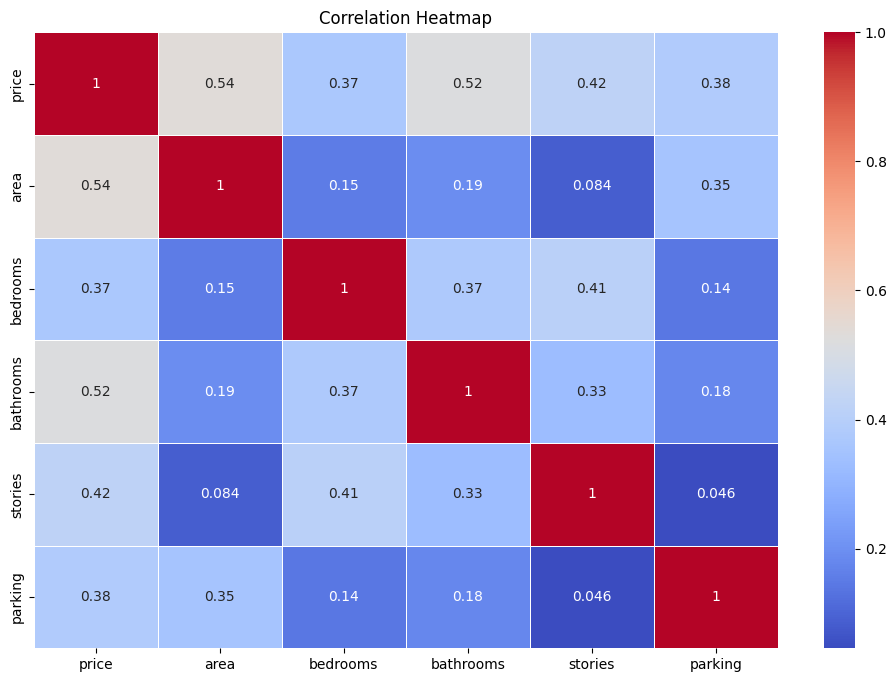

In [ ]:

numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

cor_matrix= df[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True).astype(int)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df

df = dummies('mainroad',df)
df = dummies('guestroom',df)
df = dummies('hotwaterheating',df)
df = dummies('basement',df)
df = dummies('airconditioning',df)
df = dummies('prefarea',df)
df = dummies('furnishingstatus',df)

In [ ]:


from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[numerical_list] = scaler.fit_transform(df_train[numerical_list])

In [ ]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('parking', True, 1),
 ('yes', True, 1),
 ('yes', True, 1),
 ('yes', True, 1),
 ('yes', False, 3),
 ('yes', True, 1),
 ('yes', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [ ]:
X_train.columns[rfe.support_]

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant for intercept
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)



#model #1
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     69.41
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           2.81e-85
Time:                        14:55:42   Log-Likelihood:                 396.09
No. Observations:                 408   AIC:                            -768.2
Df Residuals:                     396   BIC:                            -720.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.018      0.185      0.8

In [ ]:
X_train_new

,const,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,...,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes
333,1.0,0.102429,0.4,0.0,0.333333,0.000000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
429,1.0,0.258624,0.6,0.0,0.333333,0.000000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18,1.0,0.243224,0.4,0.5,0.333333,0.666667,1,1,0,0,...,0,0,1,0,1,1,0,0,1,0
480,1.0,0.144667,0.4,0.0,0.333333,0.333333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
505,1.0,0.190426,0.4,0.0,0.333333,0.000000,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.118268,0.2,0.0,0.000000,0.000000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53,1.0,0.291623,0.4,0.5,1.000000,0.666667,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
350,1.0,0.139388,0.2,0.0,0.333333,0.333333,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
79,1.0,0.366420,0.4,0.5,0.666667,0.000000,1,1,0,0,...,0,0,1,0,1,1,0,0,1,0


In [ ]:
X_train_new = X_train_new.drop(["bedrooms"], axis = 1)

#model 2

X_train_new = build_model(X_train_new,y_train)

checkVIF(X_train_new)

#Dropping the 'Yes' dummies column due to very high vif scores
X_train_new = X_train_new.drop(["yes"], axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     76.05
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           7.27e-86
Time:                        14:55:48   Log-Likelihood:                 395.21
No. Observations:                 408   AIC:                            -768.4
Df Residuals:                     397   BIC:                            -724.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0183      0.014      1.332      0.1

In [ ]:
#model 3
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     122.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           2.50e-68
Time:                        14:55:54   Log-Likelihood:                 339.28
No. Observations:                 408   AIC:                            -668.6
Df Residuals:                     403   BIC:                            -648.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.011      6.657      0.0

Text(0.5, 0, 'Errors')

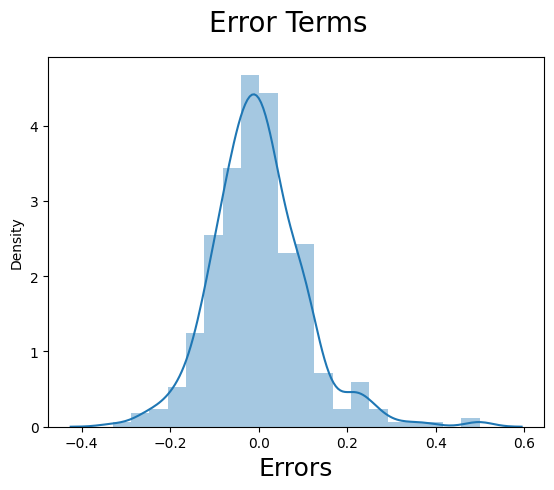

In [ ]:
lm = sm.OLS(y_train,X_train_new).fit()

y_train_price = lm.predict(X_train_new)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [ ]:
print(reg.score(x_test, y_test))

print(forest.score(x_test, y_test))

0.6754027404090299
0.6319262752751633


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict using models
y_pred_reg = reg.predict(x_test)
y_pred_forest = forest.predict(x_test)

# Calculate R2 score
r2_reg = r2_score(y_test, y_pred_reg)
r2_forest = r2_score(y_test, y_pred_forest)
print(f"Linear Regression R²: {r2_reg}")
print(f"Random Forest R²: {r2_forest}")

# Calculate Mean Squared Error (MSE)
mse_reg = mean_squared_error(y_test, y_pred_reg)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Linear Regression MSE: {mse_reg}")
print(f"Random Forest MSE: {mse_forest}")

# Calculate Mean Absolute Error (MAE)
mae_reg = mean_absolute_error(y_test, y_pred_reg)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
print(f"Linear Regression MAE: {mae_reg}")
print(f"Random Forest MAE: {mae_forest}")

Linear Regression R²: 0.6754027404090299
Random Forest R²: 0.6319262752751633
Linear Regression MSE: 1125954708714.5469
Random Forest MSE: 1276764763911.645
Linear Regression MAE: 776391.6861414402
Random Forest MAE: 803513.5473577236


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predicting individual models
y_pred_reg = reg.predict(x_test)
y_pred_forest = forest.predict(x_test)

# Averaging predictions
y_pred_ensemble = (y_pred_reg + y_pred_forest) / 2

# Calculate accuracy
ensemble_r2 = r2_score(y_test, y_pred_ensemble)
ensemble_mse = mean_squared_error(y_test, y_pred_ensemble)
ensemble_mae = mean_absolute_error(y_test, y_pred_ensemble)

print(f"Ensemble R²: {ensemble_r2}")
print(f"Ensemble MSE: {ensemble_mse}")
print(f"Ensemble MAE: {ensemble_mae}")


Ensemble R²: 0.6884154972620108
Ensemble MSE: 1281270577087.2964
Ensemble MAE: 821702.1606149132


In [ ]:
# Weighted averaging predictions (is worse sometimes but kept it in for testing)
y_pred_ensemble_weighted = (y_pred_reg * weight_reg) + (y_pred_forest * weight_forest)

# Calculate accuracy metrics for the weighted ensemble
ensemble_weighted_r2 = r2_score(y_test, y_pred_ensemble_weighted)
ensemble_weighted_mse = mean_squared_error(y_test, y_pred_ensemble_weighted)
ensemble_weighted_mae = mean_absolute_error(y_test, y_pred_ensemble_weighted)

print(f"Weighted Ensemble R²: {ensemble_weighted_r2}")
print(f"Weighted Ensemble MSE: {ensemble_weighted_mse}")
print(f"Weighted Ensemble MAE: {ensemble_weighted_mae}")

Weighted Ensemble R²: 0.6863471501944698
Weighted Ensemble MSE: 1289775853240.4995
Weighted Ensemble MAE: 828995.0900951129
